In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"F:\anlas\Python ile Makine Öğrenmesi\diabetes.csv")
data2 = data.copy()
data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = data2["Outcome"]
X = data2.drop(columns="Outcome",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(f"Yerleşik: {model.score(X_test,y_test)}\nFonksiyonel: {accuracy_score(y_test,preds)}")
# Dökümantasyonu karıştırırken accuracy_scoreye gerek olmadığını gördüm
# Hem yerleşik fonksiyon hemde metrikler kısmındaki fonksiyon da aynı çıktıyı veriyor
# Bu çalışmada model Tuning yapacağız

Yerleşik: 0.7467532467532467
Fonksiyonel: 0.7467532467532467


In [15]:
params = {"criterion":["gini","entropy"],
          "max_depth":[2,5,10],
          "min_samples_split":[2,5,10],
          "n_estimators":[50,200,500,1000]}
grid = GridSearchCV(model,param_grid=params,n_jobs=-1,cv=10)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 200}

Bizim için en iyi değerleri GridSearchCV ile belirledik şimdi bunlarla ikinci bir model oluşturarak başarısını ve diğer değerlerini kontrol edelim.

In [31]:
model2 = RandomForestClassifier(criterion="entropy",max_depth=5,min_samples_split=5,n_estimators=200)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)
# Doğruluk oranı düştü. Bunun nedeni tahmin edileceği gibi
# GridSearchCV bir local optimum noktasına takıldı. 
# Bunu aşmak için istersek aralık verme veya randomsearch gibi
# algoritmaları da kullanabiliriz. Farklı farklı çözümleri mevcut zamanla 
# çalışmalar yapacağım.

0.7077922077922078

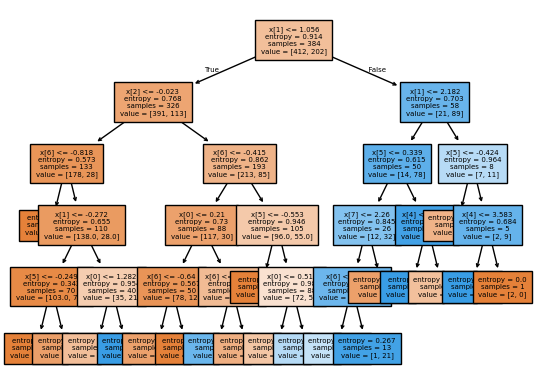

In [33]:
plot_tree(model2[199],filled=True,fontsize=5)
plt.show()

Burada modelin içinde kullanılan bağımsız değişkenlerin, bağımlı değişken üzerindeki önem seviyelerini de görebiliriz. 

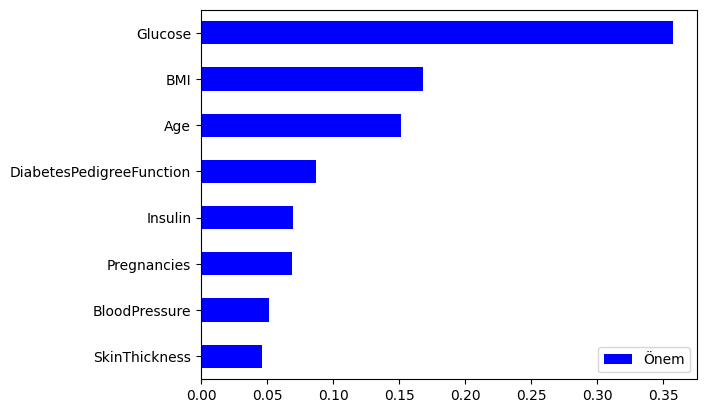

In [35]:
önem = pd.DataFrame({"Önem":model2.feature_importances_},index=X.columns)
önem.sort_values(by="Önem",axis=0,ascending=True).plot(kind="barh",color="blue")
plt.show()

Basit bir şekilde data frame oluşturduk sonrasında bunun içine Önem adında bir sütun oluşturduk ve bunları model.feature_importances_ dan bağımsız değişkenlerin belirlenen önem sırasına göre aldık. Sonrasında bunları indexlemek için X.columns diyerek X yani bağımsız değişkenlerimiz üzerinden sütun isimlerine göre indeksledik sonrasında. sort_values ile bunları axis=0 yani satırlara göre sıraladık ve bar grafiğini çizdirerek hem büyükten küçüğe sıralamış hem de bar grafiği ile görmüş olduk